In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm

In [5]:
M = 210
n = np.arange(M)

Fs = 1000 #frecuencia de muestreo
Ts = 1/Fs # periodo de muestreo a 1ms

F1 = 40 #frecuencia 1
T1 = 1/F1
F2 = 250 #frecuencia 2
T2 = 1/F2

x1 = np.sin(2*np.pi*F1*n/Fs)
x2 = np.sin(2*np.pi*F2*n/Fs)

x = x1+x2

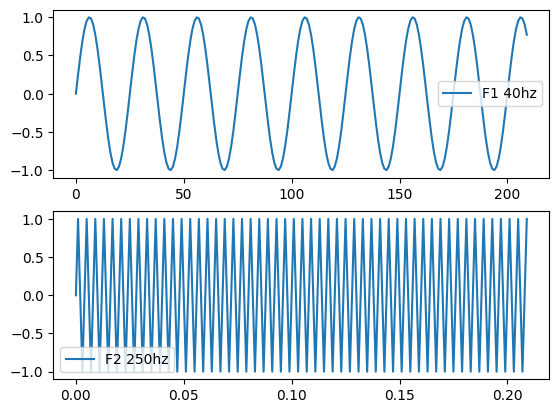

In [6]:
#eje de tiempo en seg
t = n/Fs

fig,axes = plt.subplots(2)
axes[0].plot(n,x1,label=f"F1 {F1}hz")
axes[0].legend()

axes[1].plot(t,x2,label=f"F2 {F2}hz")
axes[1].legend()

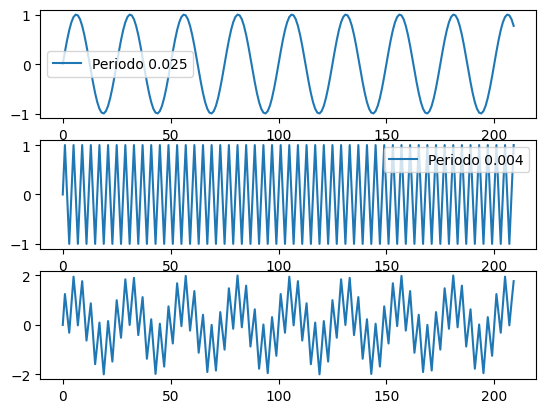

In [7]:
fig,axes = plt.subplots(3)
axes[0].plot(n,x1,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(n,x2,label=f"Periodo {T2}")
axes[1].legend()
axes[2].plot(n,x)

## DFT de N puntos

## Forma 1

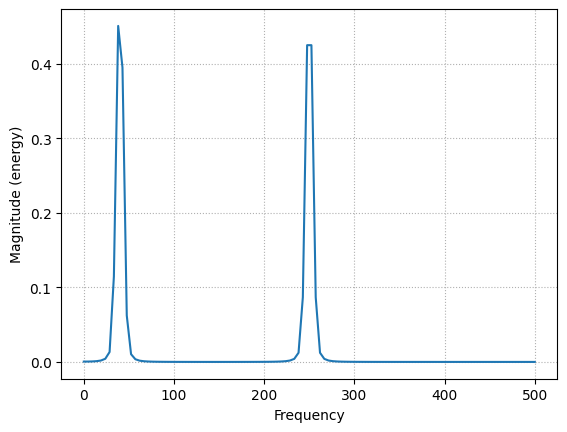

In [11]:
import matplotlib.pyplot as plt

plt.magnitude_spectrum(x, Fs=1000)
plt.grid(ls=":")
plt.show()

## Forma 2

In [12]:
#transformada de fourier FFT
N = 1024
X = np.fft.fft(x,N)
print(X.shape)

X = X[0:(N//2)]

(1024,)


In [13]:
#magnitud
Xm = np.abs(X)
Xm = np.round(Xm,3)

#frecuencias
F = np.linspace(0, Fs/2, N//2)

#eje de tiempo en seg
t = n/Fs

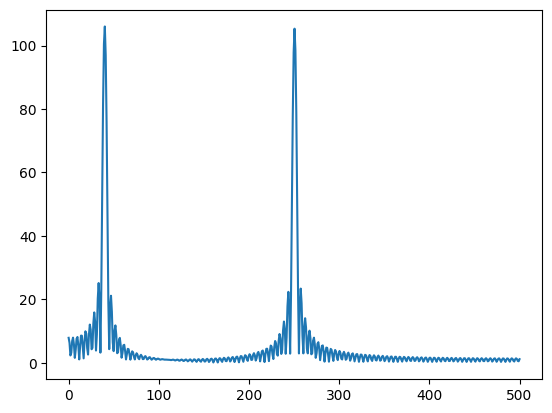

In [14]:
plt.plot(F,Xm)

## Diseñar el filtro FIR pasa bajos

In [15]:
#longitud de la ventana
M = 37
#frecuencia de corte en Hz
Fc = 120

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
w = np.round(w,3)

In [16]:
nm = np.arange(M)
W = np.fft.fft(w,N)
W = np.round(W[0:N//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N//2])
Ry = np.linspace(0,1,N//2)

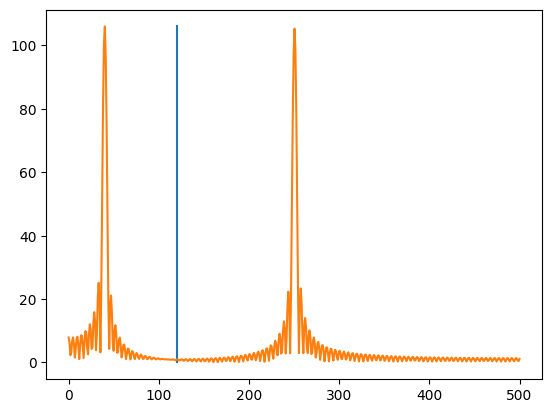

In [17]:
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Xm)

### Aplicación del filtro FIR a la entrada x

In [18]:
y = lfilter(w, np.array(1),x) # x=x1+x2   40hz +  250hz
Y = np.fft.fft(y,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)


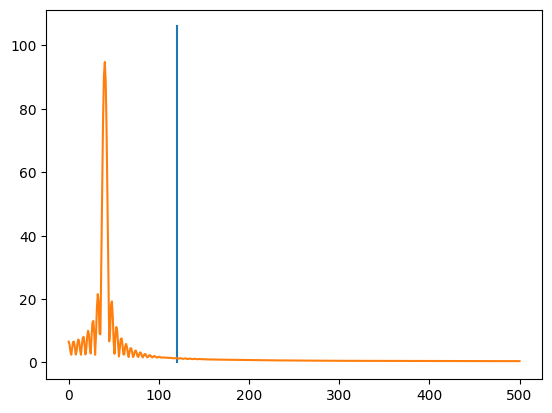

In [19]:
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Ym)

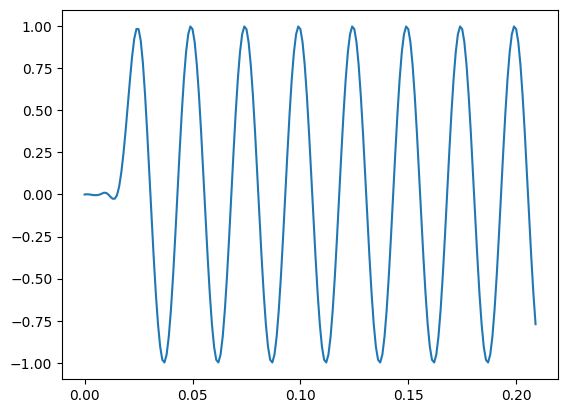

In [20]:
plt.plot(t,y)

(array([2.62452775e-03, 2.70397391e-03, 2.95913430e-03, 3.45738530e-03,
        4.40894214e-03, 6.64622166e-03, 1.52097248e-02, 1.15537142e-01,
        4.50853213e-01, 3.94142911e-01, 6.38192287e-02, 1.21104851e-02,
        5.24356364e-03, 3.02896352e-03, 1.95397363e-03, 1.31219365e-03,
        8.92376033e-04, 6.13478144e-04, 4.37462628e-04, 3.37323590e-04,
        2.82747736e-04, 2.44739298e-04, 2.06566473e-04, 1.64364874e-04,
        1.22320961e-04, 8.90281971e-05, 7.32070973e-05, 7.27525815e-05,
        7.51188367e-05, 7.22482341e-05, 6.27547657e-05, 4.86216352e-05,
        3.30455275e-05, 1.92990272e-05, 1.03898262e-05, 7.92709533e-06,
        7.71617091e-06, 6.32974115e-06, 4.15614373e-06, 2.74313563e-06,
        2.53371060e-06, 1.95820503e-06, 1.01358063e-06, 2.70705015e-06,
        5.04051692e-06, 6.77430226e-06, 7.59278129e-06, 7.79514740e-06,
        8.17243177e-06, 9.25953947e-06, 1.06635270e-05, 1.15829752e-05,
        1.14815748e-05, 1.02901670e-05, 8.39958670e-06, 6.581150

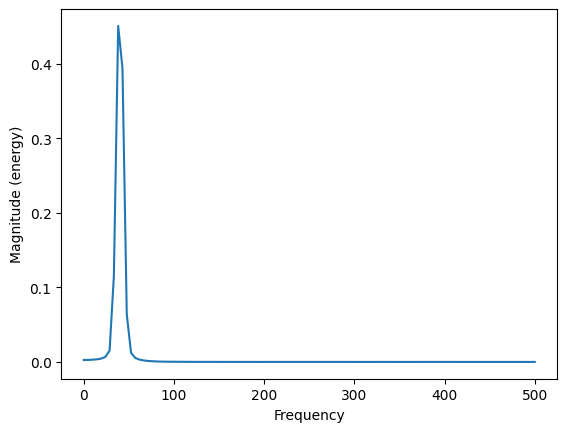

In [21]:
plt.magnitude_spectrum(y, Fs=1000)

In [ ]:
periodo = 0.0420 - 0.0160
"Periodo de la señal: %.3f"%periodo

'Periodo de la señal: 0.026'

# pruebas con entradas

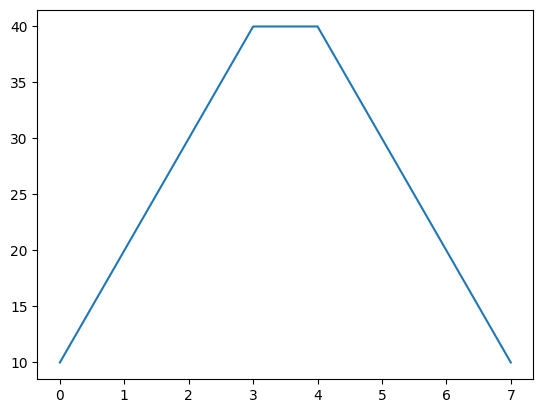

In [22]:
xx = np.array([10,20,30,40,40,30,20,10])


plt.plot(xx)

In [23]:

yy = lfilter(w,np.array(1),xx)
yy = np.round(yy,3)

In [24]:
print("orden del filtro:",M)
print("Coeficientes del filtro:\n")

for h in w:
    print(h)

orden del filtro: 37
Coeficientes del filtro:

0.001
0.0
-0.001
-0.003
-0.004
-0.002
0.003
0.01
0.014
0.009
-0.006
-0.027
-0.04
-0.031
0.009
0.077
0.154
0.216
0.24
0.216
0.154
0.077
0.009
-0.031
-0.04
-0.027
-0.006
0.009
0.014
0.01
0.003
-0.002
-0.004
-0.003
-0.001
0.0
0.001


In [ ]:
print("Respuestas y ante x")
for k in range(len(xx)):
    print("y["+str(k)+"]: ",yy[k])

Respuestas y ante x
y[0]:  -0.01
y[1]:  -0.01
y[2]:  0.01
y[3]:  0.03
y[4]:  0.02
y[5]:  -0.03
y[6]:  -0.06
y[7]:  -0.0


## Uso de pyfda con scipy

In [25]:
y = lfilter(w, 1,x) 

In [39]:
import pandas as pd

df = pd.read_csv("filtro_FIR_pyfda1.csv", names=["b"])
df.head()

,b
0,0.000320
1,0.000916
2,0.001341
3,0.001357
4,0.000666


In [42]:
b = df["b"].to_numpy()

### Convolucion entre el filtro y la señal de entrada

#### Aplicando el filtro pasa baja

In [44]:
y = lfilter(b, 1,x) 

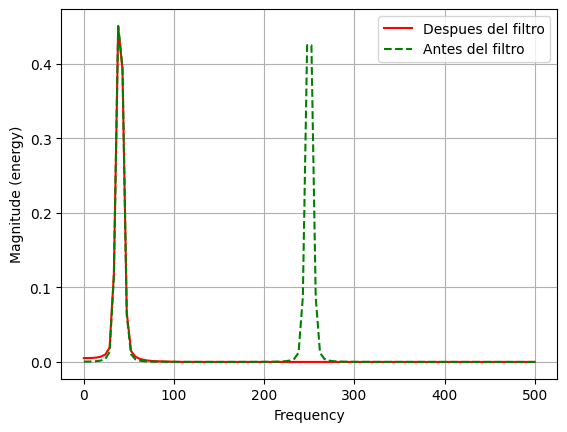

In [54]:
plt.magnitude_spectrum(y, Fs=1000, color="red", label="Despues del filtro")
plt.magnitude_spectrum(x, Fs=1000, color="green", ls="--", label="Antes del filtro")
plt.legend()
plt.grid("--")

plt.show()

## Usando filtros IIR

In [55]:
df2 = pd.read_csv("filtro_IIR_pyfda1.csv", names=["b", "a"])
df2.head()

,b,a
0,0.000009,1.000000
1,0.000053,-5.285938
2,0.000134,11.983370
3,0.000178,-14.886944
4,0.000134,10.677815


In [56]:
b = df2["b"].to_numpy()
a = df2["a"].to_numpy()

In [57]:
y2 = lfilter(b, a,x) 

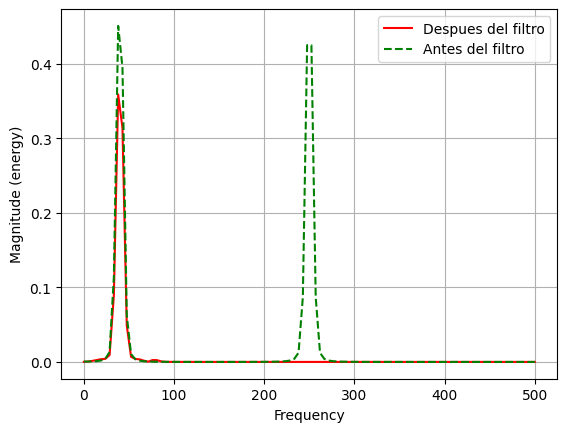

In [58]:
plt.magnitude_spectrum(y2, Fs=1000, color="red", label="Despues del filtro")
plt.magnitude_spectrum(x, Fs=1000, color="green", ls="--", label="Antes del filtro")
plt.legend()
plt.grid("--")

plt.show()

## Usando Bessel

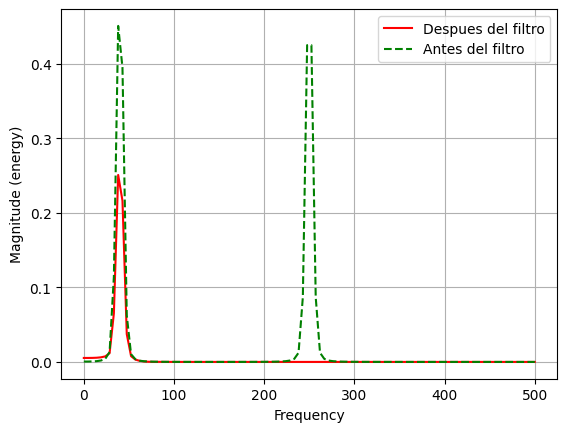

In [60]:
df2 = pd.read_csv("filtro_IIR_pyfda_bessel.csv", names=["b", "a"])
b = df2["b"].to_numpy()
a = df2["a"].to_numpy()

y2 = lfilter(b, a,x) 

plt.magnitude_spectrum(y2, Fs=1000, color="red", label="Despues del filtro")
plt.magnitude_spectrum(x, Fs=1000, color="green", ls="--", label="Antes del filtro")
plt.legend()
plt.grid("--")

plt.show()
